In [1]:
!python -V

Python 3.7.4


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from itertools import combinations

from scipy.integrate import odeint
import os
from haversine import haversine
import json

In [5]:
def distance(a,b): #((lat1, lon1), (lat1, lon1))
    return (haversine(a,b))

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import os

states = pd.read_csv(r'state_population.csv')#getting the population file
states.columns
Pop_list = []
State_list = []
for rows in states.itertuples():
    my_list =[rows.Population]
    Pop_list.append(my_list)


def SUTRA(P, T0, Rt0, D0):
    # Total population, P.
    # Initial number of infected and recovered individuals, I0 and R0.
    #I0, R0 = 1, 0 # initial tested positive #Initial recovered after being tested positive
    U0 = T0*0.5 # Initial Undetected positive cases
    Ru0 = U0*0.3 #Initial recovered from Undetected positive cases# initia deaths
    N = P-D0 # remaining population
    
    S0 = N - U0 - T0 - Ru0 - Rt0 - D0 #S0, is susceptible to infection initially.
    
    #print("N:", N)
    #print("S0", S0)
    #print("Number immune:", N-S0)
    
    # beta = P(infection|contact between susceptible and Undetected)
    # gamma = rate at which infected people recover i.e rate of change of recover wrt time
    beta, gamma = 0.2, 1./31 #1./31
    
    #epsilon = fraction of undetected that get tested positive
    epsilon =  0.3
    
    #the rate a which people are dying
    eta = 0.063951
    
    # A grid of time points linspace(start, stop, num), (in days)
    t = np.linspace(0, 10, 10) 
    #print(t)
    # The SUTRA model differential equations.
    def deriv(y, t, N, beta, gamma, epsilon, eta):
        S, U, T, Ru, Rt, D = y
        
        dSdt = (-beta * S * U )/ N
        dUdt = (beta * S * U / N ) - ((epsilon * beta * S * U) / N )- (gamma * U)
        dTdt = ((epsilon * beta * S * U) / N ) - (gamma * T)
        dRudt = gamma * U
        dRtdt = gamma * T
        dDdt = eta * T
        
        return dSdt, dUdt, dTdt, dRudt, dRtdt, dDdt
    
    # Initial conditions vector
    y0 = S0, U0, T0, Ru0, Rt0, D0
    # Integrate the SUTRA equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, epsilon, eta))
    S, U, T, Ru, Rt, D = ret.T
    
    #print("S", S[-1])
    #print("U", U[-1])
    #print("T", T[-1])
    #print("Ru", Ru[-1])
    #print("Rt", Rt[-1])
    #print("D:", D[-1])
    #print("N", S[-1]+U[-1]+T[-1]+Ru[-1]+Rt[-1])
    #print("Tested +ve:", T)
    #print("New infections: ", T[-1] - T0)
    new_inf = T[-1]-T0
    return new_inf



dict1={} # dictionary containing new infection per state
for i in range(len(Pop_list)):
    Pop = Pop_list[i][0]
    pathname1 = '.\States' #change this path to the path containing all the state files, 
    #note that all the files must be in the smae order as the first column of pop file
    def foo(path):
        var = os.listdir(path)[i]
        return var
    
    klingon = foo(pathname1)
    klingon_long = os.path.join(pathname1,klingon)
    key = klingon.split(".")
    key_name = key[0]
    state_each = pd.read_csv(klingon_long)
    Test_pos = state_each.loc[(state_each.shape[0]-11),'Confirmed']
    Recover_test_pos = state_each.loc[(state_each.shape[0]-11),'Recovered']
    Decease = state_each.loc[(state_each.shape[0]-11),'Deceased']
    var = SUTRA(Pop,Test_pos,Recover_test_pos,Decease)   
    dict1[key_name] = var

print(dict1)

# Plot the data on three separate curves for S(t), I(t) and R(t)
# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
# ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(t, U/N, 'r', alpha=0.5, lw=2, label='Undetected')
# ax.plot(t, T/N, 'g', alpha=0.5, lw=2, label='Recovered from Undected')
# ax.plot(t, Ru/N, 'y', alpha=0.5, lw=2, label='Recovered from Undected')
# ax.plot(t, Rt/N, 'k', alpha=0.5, lw=2, label='Recovered from tested positive')

# ax.set_xlabel('Time /days')
# ax.set_ylabel('Number ('+str(N)+')')
# ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
    # ax.spines[spine].set_visible(False)
# plt.show()

{'AN': 7.925511576845764, 'AP': 4416.390370550296, 'AR': 50.67411042526436, 'AS': 1082.4540989185734, 'BR': 1536.4537401073121, 'CH': 149.13739462728802, 'CT': 1799.3091379097386, 'DL': 2059.276232405875, 'DN': 19.78938636058595, 'GA': 481.9483465774133, 'GJ': 2125.342375335842, 'HP': 969.8413240337113, 'HR': 2418.75052173081, 'JH': 987.9512764662541, 'JK': 860.247782941573, 'KA': 6944.400984221014, 'KL': 7793.364113349431, 'LA': 21.50186498020068, 'LD': 36.78462319303992, 'MH': 8398.061151493064, 'ML': 116.99395544209085, 'MN': 110.82566187607756, 'MP': 1667.665174687827, 'MZ': 27.933912966301847, 'NL': 72.47399314173919, 'OR': 2105.686128944233, 'PB': 1661.3666743987378, 'PY': 377.7802244220852, 'RJ': 3138.4349635479994, 'SK': 45.60819111542526, 'TG': 929.217556607211, 'TN': 6042.135937505074, 'TR': 95.10990981793987, 'UP': 3516.665241998886, 'UT': 1400.1357616387559, 'WB': 4121.638943258691}


In [2]:
supp = pd.read_csv("oxygen.csv")

In [16]:
supp.values[0]

array(['AS', 32690, 26.14, 91.77], dtype=object)

In [20]:
supp

,State,Capacity(MT) per day,lat,lon
0,AS,32690,26.140000,91.770000
1,CT,85,21.489585,81.809612
2,GJ,488,20.419862,72.837063
3,HR,40,29.000000,76.000000
4,HP,120,31.929235,77.182846
5,JH,434,23.455981,85.255730
6,KL,298,10.352959,76.511975
7,KA,275,14.520390,75.722352
8,MH,991,19.531932,76.055457
9,OR,340,20.291850,85.805340


In [31]:
a = supp.loc[supp['State'] == 'AS']
supp_lat = supp["lat"].tolist()
supp_lng = supp["lon"].tolist()

In [30]:
a.values[0]

array(['AS', 32690, 26.14, 91.77], dtype=object)

In [32]:
supp_lat

[26.14,
 21.489585,
 20.419862,
 29.0,
 31.929235,
 23.455981,
 10.352959,
 14.520389999999999,
 19.531932,
 20.29185,
 26.810578000000003,
 17.99,
 11.80835,
 11.934057000000001,
 30.041738,
 27.130334,
 22.996495]

In [34]:
supp_lng

[91.77,
 81.809612,
 72.837063,
 76.0,
 77.182846,
 85.25573,
 76.511975,
 75.722352,
 76.05545699999999,
 85.80534,
 73.768455,
 79.59,
 79.774516,
 79.83064499999999,
 79.089691,
 80.859666,
 87.685588]

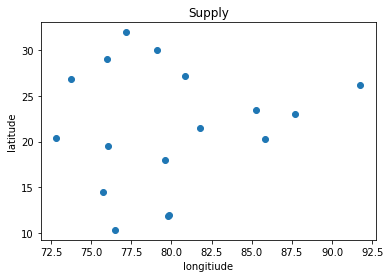

In [36]:
#Visualize
plt.scatter(supp_lng, supp_lat)
plt.title("Supply")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.show()

In [12]:
with open("states_location.json", "r") as f:
    data = f.read()
st_loc = json.loads(data)

In [45]:
list(st_loc)

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Himachal Pradesh',
 'Haryana',
 'Jharkhand',
 'Jammu and Kashmir',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Maharashtra',
 'Meghalaya',
 'Manipur',
 'Madhya Pradesh',
 'Mizoram',
 'Odisha',
 'Punjab',
 'Puducherry',
 'Rajasthan',
 'Telangana',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'Sikkim',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Nagaland',
 'Lakshadweep']

In [38]:
dem_lat = []
dem_lng = []
for key in st_loc:
    dem_lat.append(st_loc[key]["lat"])
    dem_lng.append(st_loc[key]["lng"])

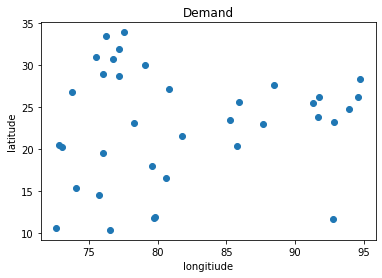

In [39]:
#visualize
plt.scatter(dem_lng, dem_lat)
plt.title("Demand")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.show()

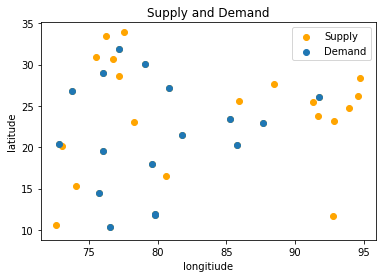

In [41]:
supply = plt.scatter(dem_lng, dem_lat, color="orange")
demand = plt.scatter(supp_lng, supp_lat)
plt.title("Supply and Demand")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.legend((supply, demand),("Supply", "Demand"))
plt.show()

In [19]:
distance((st_loc["Lakshadweep"]["lat"],st_loc["Lakshadweep"]["lng"]), (supp.values[0][2],supp.values[0][3]))

2653.3826444868723

In [51]:
index_head = supp["State"].tolist()
column_head = list(st_loc)

index_head.append("eff_capacity")
index_head.append("ec_rem")
column_head.append("samples")
column_head.append("samp_rem")

data = np.zeros((len(index_head),len(column_head)))

dist_mat = pd.DataFrame(data=data, index = index_head, columns = column_head, dtype=object)
dist_mat = dist_mat.rename_axis("Supply", axis="index")
dist_mat = dist_mat.rename_axis("Demand", axis="columns")

In [52]:
dist_mat

Demand,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Sikkim,Dadra and Nagar Haveli and Daman and Diu,Nagaland,Lakshadweep,samples,samp_rem
Supply,,,,,,,,,,,,,,,,,,,,,
AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize the data
The visualizations will be a little bent as in the cartesian coordinate the plane is flat, this is just to get an overall idea
as to how the labs and District CC are distributed

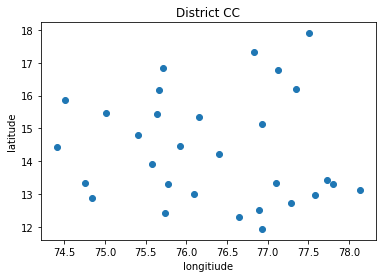

In [9]:

plt.scatter(distr_lon, distr_lat)
plt.title("District CC")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.show()

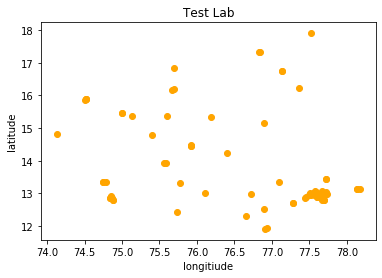

In [10]:
plt.scatter(lab_lon, lab_lat, color="orange")
plt.title("Test Lab")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.show()

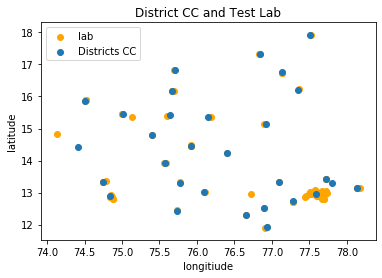

In [11]:
lab = plt.scatter(lab_lon, lab_lat, color="orange")
distr = plt.scatter(distr_lon, distr_lat)
plt.title("District CC and Test Lab")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.legend((lab, distr),("lab", "Districts CC"))
plt.show()

# some important functions

In [12]:
# degree to radian conversion, not used
#def deg2rad(val):
#    return val/math.pi/180

#parameters: latitude and longitude for two locations/points 
# return: Haversine distance between two coordinates
def distance(lat1, lon1, lat2, lon2):
    R = 6378137; #Earth’s mean radius in meter
    dLat = math.radians(lat2 - lat1)
    dLong = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLong / 2) * math.sin(dLong / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    
    return d/1000

#Since the distance between the points is less than 40, we are assuming the surface to be a plane
#parameters: object with coordinates of different points
#return: centroid of the points
def centroid(obj):
    sum_x=0; sum_y=0;
    for x in range(0, len(obj)):
        sum_x += lab_lat[obj[x]-1]
        sum_y += lab_lon[obj[x]-1]
    return([sum_x/len(obj), sum_y/len(obj)])

In [13]:
#check if supply is equal to deamnd if not add dummy value and create an empty matrix with zero  values

index_head = [x for x in range(1,31)]
column_head = [x for x in range(1, 87)]
print("Total samples/supply: ", sum(samples))
print("Total Demand/effective capacity: ", sum(capacity)-sum(backlogs))
print("Difference: ", abs(sum(samples) - (sum(capacity)-sum(backlogs))))

if sum(samples) > sum(capacity)-sum(backlogs):
    data = np.zeros((32,89))
    column_head.append("dummy")
    print("Supply greater than demand, add a dummy lab with dummy demands")
elif sum(samples) < sum(capacity)-sum(backlogs):
    data = np.zeros((33,88))
    index_head.append("Dummy")
    print("Demand greater than supply, add dummy district cc with dummy samples as supply")
else:
    data = np.zeros((32,88))
    print("Demand equals to supply, no dummy required")

index_head.append("eff_capacity")
index_head.append("ec_rem")
column_head.append("samples")
column_head.append("samp_rem")

dist_mat = pd.DataFrame(data=data, index = index_head, columns = column_head, dtype=object)
dist_mat = dist_mat.rename_axis("District CC", axis="index")
dist_mat = dist_mat.rename_axis("Test Lab", axis="columns")
if dist_mat.shape == (32, 89):
    dist_mat["dummy"]["eff_capacity"]= sum(samples) - (sum(capacity)-sum(backlogs))
    dist_mat["dummy"]["ec_rem"]= sum(samples) - (sum(capacity)-sum(backlogs))
else:
    dist_mat["samples"]["dummy"]= (sum(capacity)-sum(backlogs)) - sum(samples)
    dist_mat["samp_rem"]["dummy"]= (sum(capacity)-sum(backlogs)) - sum(samples)

Total samples/supply:  79665
Total Demand/effective capacity:  73989
Difference:  5676
Supply greater than demand, add a dummy lab with dummy demands


In [14]:
dist_mat

Test Lab,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,dummy,samples,samp_rem
District CC,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#fill matrix in a manner such that each cell value [a,b,c,d] where
#    a: distance between district and lab
#    b: cost of lab i,e 800/1600 or 10000 for dummy
#    c: 0, for same district
#       1, for other district
#    d: allocation made to the cell

#eff_ capacity has values [p,q] where
#    p: effective capacity= capacity-backlogs
#    q: possible overload values
#ec_rem is initialized with same values as eff_capacity but is updated over time with new allocation

# Samples and Samp_rem carry sample values in each district

for y in range(0,30):
    lat1 = distr_lat[y]
    lon1 = distr_lon[y]
    for x in range(0,86):
        lat2 = lab_lat[x]
        lon2 = lab_lon[x]
        
        dist = distance(lat1, lon1, lat2, lon2)
        # [distance, cost, same or outside dist: 0 for same; 1 for other, allocation]
        dist_mat[x+1][y+1] = [dist, 800 if lab_type[x] == 0 else 1600, 0 if distr_id[x] == y+1 else 1, 0] 
        
for x in range(0, 86):
    if backlogs[x]<capacity[x]:
        dist_mat[x+1]["eff_capacity"] = [capacity[x]-backlogs[x], 100]
        dist_mat[x+1]["ec_rem"] = [capacity[x]- backlogs[x], 100]
    else:
        dist_mat[x+1]["eff_capacity"] = [0, 100-(backlogs[x]-capacity[x]) if 100-(backlogs[x]-capacity[x])>=0 else 0]
        dist_mat[x+1]["ec_rem"] = [0, 100-(backlogs[x]-capacity[x]) if 100-(backlogs[x]-capacity[x])>=0 else 0]
for y in range(0, 30):
    dist_mat["samples"][y+1] = samples[y]
    dist_mat["samp_rem"][y+1] = samples[y]
    dist_mat["dummy"][y+1] = [0.0, 10000, 0, 0] #[distance, cost, same or outside dist: 0 for same; 1 for other, allocation]

In [16]:
dist_mat

Test Lab,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,dummy,samples,samp_rem
District CC,,,,,,,,,,,,,,,,,,,,,
1,"[414.692686056724, 800, 1, 0]","[411.22826788759664, 800, 1, 0]","[414.08312428667233, 800, 1, 0]","[441.2298397424188, 800, 1, 0]","[354.532619328969, 800, 1, 0]","[248.26235817609583, 800, 1, 0]","[180.90480298079612, 800, 1, 0]","[414.77283786135155, 800, 1, 0]","[173.51392992470142, 800, 1, 0]","[377.12160466869983, 800, 1, 0]",...,"[155.42114685055657, 800, 1, 0]","[126.32299365536038, 1600, 1, 0]","[416.7625311238073, 1600, 1, 0]","[410.73775861517356, 1600, 1, 0]","[373.55369156620816, 1600, 1, 0]","[411.9360272080831, 1600, 1, 0]","[371.7988000678832, 1600, 1, 0]","[0.0, 10000, 0, 0]",1139,1139
2,"[464.72095185699277, 800, 1, 0]","[461.34472166137243, 800, 1, 0]","[465.4714397088222, 800, 1, 0]","[456.9328974997222, 800, 1, 0]","[360.84445294678954, 800, 1, 0]","[242.4016904983314, 800, 1, 0]","[298.2909087794798, 800, 1, 0]","[465.03324852975135, 800, 1, 0]","[267.8899078686091, 800, 1, 0]","[334.5272729270474, 800, 1, 0]",...,"[152.77713644734558, 800, 1, 0]","[3.3765292676840852, 1600, 0, 0]","[470.3469429466005, 1600, 1, 0]","[465.77022018594454, 1600, 1, 0]","[400.52090852137536, 1600, 1, 0]","[458.1669186408011, 1600, 1, 0]","[329.56368144681375, 1600, 1, 0]","[0.0, 10000, 0, 0]",2144,2144
3,"[256.01034911072406, 800, 1, 0]","[252.67896964591594, 800, 1, 0]","[254.24526498804528, 800, 1, 0]","[316.4565755133661, 800, 1, 0]","[254.2991775413942, 800, 1, 0]","[199.20591299116174, 800, 1, 0]","[243.09396126078607, 800, 1, 0]","[255.88050163874144, 800, 1, 0]","[3.3626050844613826, 800, 0, 0]","[339.00551107360894, 800, 1, 0]",...,"[168.70346762171303, 800, 1, 0]","[271.23095232983, 1600, 1, 0]","[254.91945216506136, 1600, 1, 0]","[248.0197728894895, 1600, 1, 0]","[243.53470053941442, 1600, 1, 0]","[256.9103919028224, 1600, 1, 0]","[334.24709699658086, 1600, 1, 0]","[0.0, 10000, 0, 0]",1710,1710
4,"[46.01364507186984, 800, 1, 0]","[44.47506137827521, 800, 1, 0]","[41.40795238948914, 800, 1, 0]","[165.90952629967043, 800, 1, 0]","[186.8485374978254, 800, 1, 0]","[251.78967869490424, 800, 1, 0]","[460.2578022044505, 800, 1, 0]","[45.29743012672259, 800, 1, 0]","[228.46018496788315, 800, 1, 0]","[324.176755447565, 800, 1, 0]",...,"[307.5514653769264, 800, 1, 0]","[456.0648320237835, 1600, 1, 0]","[36.12148533773485, 1600, 1, 0]","[28.596539705992143, 1600, 1, 0]","[122.46467073214403, 1600, 1, 0]","[57.74484690216911, 1600, 1, 0]","[322.07335085640597, 1600, 1, 0]","[0.0, 10000, 0, 0]",2167,2167
5,"[3.314778214388264, 800, 0, 0]","[1.5190134148387335, 800, 0, 0]","[4.422018077057737, 800, 0, 0]","[125.00843326631627, 800, 1, 0]","[161.10378682396774, 800, 1, 0]","[243.76370442598068, 800, 1, 0]","[491.92701635991745, 800, 1, 0]","[3.1510571878321674, 800, 0, 0]","[254.52120932729628, 800, 1, 0]","[297.9692581078115, 800, 1, 0]",...,"[311.18600474633644, 800, 1, 0]","[463.65552099311014, 1600, 1, 0]","[13.402550285946958, 1600, 0, 0]","[17.02882152746891, 1600, 0, 0]","[93.80365870552393, 1600, 1, 0]","[15.73251580681872, 1600, 0, 0]","[296.4273058028427, 1600, 1, 0]","[0.0, 10000, 0, 0]",36307,36307
6,"[554.053645674439, 800, 1, 0]","[551.0955323029974, 800, 1, 0]","[551.0692064139547, 800, 1, 0]","[630.1650786338566, 800, 1, 0]","[567.0783391486356, 800, 1, 0]","[489.7922094179458, 800, 1, 0]","[96.64757749822454, 800, 1, 0]","[553.6953848795413, 800, 1, 0]","[314.37299905332014, 800, 1, 0]","[630.706312014677, 800, 1, 0]",...,"[414.7967418790942, 800, 1, 0]","[391.20974498134944, 1600, 1, 0]","[549.1243430141226, 1600, 1, 0]","[541.5433825109171, 1600, 1, 0]","[557.2946903411582, 1600, 1, 0]","[558.5906021005108, 1600, 1, 0]","[625.4955421032721, 1600, 1, 0]","[0.0, 10000, 0, 0]",545,545
7,"[133.08236383244085, 800, 1, 0]","[134.61138557765818, 800, 1, 0]","[137.8411310754775, 800, 1, 0]","[53.3771768031371, 800, 1, 0]","[150.51046365869567, 800, 1, 0]","[268.34946470138703, 800, 1, 0]","[601.3279532187272

In [17]:
#how to access
dist_mat[1]["eff_capacity"] #dist_mat["lab_id"]["district cc id"]

[2618, 100]

# ___________________demand-supply matrix created___________________________________

# Create matrix/dataframe for distance between labs


In [18]:
data = np.zeros((86,86))
index_head = [x for x in range(1,87)]
column_head = [x for x in range(1, 87)]

lab_to_lab_dist = pd.DataFrame(data=data, index = index_head, columns = column_head, dtype=object)

In [19]:
for y in range(0,86):
    lat1 = lab_lat[y]
    lon1 = lab_lon[y]
    for x in range(0,86):
        lat2 = lab_lat[x]
        lon2 = lab_lon[x]
        
        dist = distance(lat1, lon1, lat2, lon2)
        lab_to_lab_dist[x+1][y+1] = dist

In [20]:
lab_to_lab_dist

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
1,0,3.46733,5.07105,123.437,161.604,245.576,495.238,0.886271,257.781,298.253,...,8.21484,247.865,66.9026,313.631,466.245,13.9211,18.8079,94.2351,14.7256,296.768
2,3.46733,0,5.89294,123.598,159.64,242.604,492.047,3.68871,254.439,296.483,...,6.04538,244.511,67.7787,310.308,462.864,14.9159,18.4584,92.3288,14.2808,294.946
3,5.07105,5.89294,0,128.501,165.525,247.83,492.888,4.20968,256.069,302.375,...,11.9305,248.768,62.1029,314.69,466.963,9.11267,13.7768,98.2199,19.5892,300.839
4,123.437,123.598,128.501,0,97.1506,215.026,558.363,124.312,317.037,205.749,...,118.417,251.343,188.843,306.598,459.2,137.094,142.034,72.9309,109.357,206.032
5,161.604,159.64,165.525,97.1506,0,118.47,487.702,162.39,254,137.517,...,153.643,162.861,225.093,212.38,363.2,174.313,175.173,67.3898,147.939,135.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,13.9211,14.9159,9.11267,137.094,174.313,254.874,492.291,13.0357,256.842,311.286,...,20.9526,253.962,53.01,320.075,471.788,0,7.66176,107.077,28.6276,309.716
83,18.8079,18.4584,13.7768,142.034,175.173,252.536,484.966,17.9698,249.979,312.471,...,23.9924,249.728,50.3549,315.97,467.172,7.66176,0,108.291,32.738,310.778
84,94.2351,92.3288,98.2199,72.9309,67.3898,165.044,485.643,95.0272,244.134,204.239,...,86.3147,187.474,158.509,247.923,402.507,107.077,108.291,0,80.5663,202.64
85,14.7256,14.2808,19.5892,109.357,147.939,235.415,497.708,15.6062,258.515,284.193,...,9.25782,241.133,81.6266,306.387,459.777,28.6276,32.738,80.5663,0,282.787


# Start Allocating according to "Minimum Cell Cost method"

In [21]:
tot_demd = 0
for x in range(1,87):
    tot_demd += dist_mat[x]["ec_rem"][0]
tot_demd += dist_mat["dummy"]["ec_rem"]
tot_supp = 0
for y in range(1,31):
    tot_supp += dist_mat["samp_rem"][y]
print("Total demand is: ", tot_demd)
print("Total Supply is: ", tot_supp)

Total demand is:  79665
Total Supply is:  79665


In [22]:
#find all govt labs in the district and allocate
for x in range(1,87):
    for y in range(1,31):
        if dist_mat[x][y][2] == 0 and dist_mat[x][y][1] == 800 and dist_mat[x]["ec_rem"][0] != 0 and dist_mat["samp_rem"][y] != 0:
            if dist_mat[x]["ec_rem"][0] > dist_mat["samp_rem"][y]: #demand more than supply
                dist_mat[x][y][3] += dist_mat["samp_rem"][y]
                dist_mat[x]["ec_rem"][0] -= dist_mat["samp_rem"][y]
                dist_mat["samp_rem"][y] = 0
            elif dist_mat["samp_rem"][y] > dist_mat[x]["ec_rem"][0]: #supply more than demnd
                dist_mat[x][y][3] = dist_mat[x][y][3] + dist_mat[x]["ec_rem"][0]
                dist_mat["samp_rem"][y] -= dist_mat[x]["ec_rem"][0]
                dist_mat[x]["ec_rem"][0] = 0
            else: #when supply equals demand
                dist_mat[x][y][3] += dist_mat[x]["ec_rem"][0]
                dist_mat[x]["ec_rem"][0] = 0
                dist_mat["samp_rem"][y] = 0

In [23]:
dist_mat

Test Lab,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,dummy,samples,samp_rem
District CC,,,,,,,,,,,,,,,,,,,,,
1,"[414.692686056724, 800, 1, 0]","[411.22826788759664, 800, 1, 0]","[414.08312428667233, 800, 1, 0]","[441.2298397424188, 800, 1, 0]","[354.532619328969, 800, 1, 0]","[248.26235817609583, 800, 1, 0]","[180.90480298079612, 800, 1, 0]","[414.77283786135155, 800, 1, 0]","[173.51392992470142, 800, 1, 0]","[377.12160466869983, 800, 1, 0]",...,"[155.42114685055657, 800, 1, 0]","[126.32299365536038, 1600, 1, 0]","[416.7625311238073, 1600, 1, 0]","[410.73775861517356, 1600, 1, 0]","[373.55369156620816, 1600, 1, 0]","[411.9360272080831, 1600, 1, 0]","[371.7988000678832, 1600, 1, 0]","[0.0, 10000, 0, 0]",1139,181
2,"[464.72095185699277, 800, 1, 0]","[461.34472166137243, 800, 1, 0]","[465.4714397088222, 800, 1, 0]","[456.9328974997222, 800, 1, 0]","[360.84445294678954, 800, 1, 0]","[242.4016904983314, 800, 1, 0]","[298.2909087794798, 800, 1, 0]","[465.03324852975135, 800, 1, 0]","[267.8899078686091, 800, 1, 0]","[334.5272729270474, 800, 1, 0]",...,"[152.77713644734558, 800, 1, 0]","[3.3765292676840852, 1600, 0, 0]","[470.3469429466005, 1600, 1, 0]","[465.77022018594454, 1600, 1, 0]","[400.52090852137536, 1600, 1, 0]","[458.1669186408011, 1600, 1, 0]","[329.56368144681375, 1600, 1, 0]","[0.0, 10000, 0, 0]",2144,0
3,"[256.01034911072406, 800, 1, 0]","[252.67896964591594, 800, 1, 0]","[254.24526498804528, 800, 1, 0]","[316.4565755133661, 800, 1, 0]","[254.2991775413942, 800, 1, 0]","[199.20591299116174, 800, 1, 0]","[243.09396126078607, 800, 1, 0]","[255.88050163874144, 800, 1, 0]","[3.3626050844613826, 800, 0, 1710]","[339.00551107360894, 800, 1, 0]",...,"[168.70346762171303, 800, 1, 0]","[271.23095232983, 1600, 1, 0]","[254.91945216506136, 1600, 1, 0]","[248.0197728894895, 1600, 1, 0]","[243.53470053941442, 1600, 1, 0]","[256.9103919028224, 1600, 1, 0]","[334.24709699658086, 1600, 1, 0]","[0.0, 10000, 0, 0]",1710,0
4,"[46.01364507186984, 800, 1, 0]","[44.47506137827521, 800, 1, 0]","[41.40795238948914, 800, 1, 0]","[165.90952629967043, 800, 1, 0]","[186.8485374978254, 800, 1, 0]","[251.78967869490424, 800, 1, 0]","[460.2578022044505, 800, 1, 0]","[45.29743012672259, 800, 1, 0]","[228.46018496788315, 800, 1, 0]","[324.176755447565, 800, 1, 0]",...,"[307.5514653769264, 800, 1, 0]","[456.0648320237835, 1600, 1, 0]","[36.12148533773485, 1600, 1, 0]","[28.596539705992143, 1600, 1, 0]","[122.46467073214403, 1600, 1, 0]","[57.74484690216911, 1600, 1, 0]","[322.07335085640597, 1600, 1, 0]","[0.0, 10000, 0, 0]",2167,2167
5,"[3.314778214388264, 800, 0, 2618]","[1.5190134148387335, 800, 0, 2428]","[4.422018077057737, 800, 0, 716]","[125.00843326631627, 800, 1, 0]","[161.10378682396774, 800, 1, 0]","[243.76370442598068, 800, 1, 0]","[491.92701635991745, 800, 1, 0]","[3.1510571878321674, 800, 0, 2356]","[254.52120932729628, 800, 1, 0]","[297.9692581078115, 800, 1, 0]",...,"[311.18600474633644, 800, 1, 0]","[463.65552099311014, 1600, 1, 0]","[13.402550285946958, 1600, 0, 0]","[17.02882152746891, 1600, 0, 0]","[93.80365870552393, 1600, 1, 0]","[15.73251580681872, 1600, 0, 0]","[296.4273058028427, 1600, 1, 0]","[0.0, 10000, 0, 0]",36307,22965
6,"[554.053645674439, 800, 1, 0]","[551.0955323029974, 800, 1, 0]","[551.0692064139547, 800, 1, 0]","[630.1650786338566, 800, 1, 0]","[567.0783391486356, 800, 1, 0]","[489.7922094179458, 800, 1, 0]","[96.64757749822454, 800, 1, 0]","[553.6953848795413, 800, 1, 0]","[314.37299905332014, 800, 1, 0]","[630.706312014677, 800, 1, 0]",...,"[414.7967418790942, 800, 1, 0]","[391.20974498134944, 1600, 1, 0]","[549.1243430141226, 1600, 1, 0]","[541.5433825109171, 1600, 1, 0]","[557.2946903411582, 1600, 1, 0]","[558.5906021005108, 1600, 1, 0]","[625.4955421032721, 1600, 1, 0]","[0.0, 10000, 0, 0]",545,0
7,"[133.08236383244085, 800, 1, 0]","[134.61138557765818, 800, 1, 0]","[137.8411310754775, 800, 1, 0]","[53.3771768031371, 800, 1, 0]","[150.51046365869567, 800, 1, 0]","[268.34946470138703, 800, 1, 0]","[601.32795321

In [24]:
#find all pvt labs in the district and allocate
for x in range(1,87):
    for y in range(1,31):
        if dist_mat[x][y][2] == 0 and dist_mat[x][y][1] == 1600 and dist_mat[x]["ec_rem"][0] != 0 and dist_mat["samp_rem"][y] != 0:
            if dist_mat[x]["ec_rem"][0] > dist_mat["samp_rem"][y]: #demand more than supply
                dist_mat[x][y][3] += dist_mat["samp_rem"][y]
                dist_mat[x]["ec_rem"][0] -= dist_mat["samp_rem"][y]
                dist_mat["samp_rem"][y] = 0
            elif dist_mat["samp_rem"][y] > dist_mat[x]["ec_rem"][0]: #supply more than demnd
                dist_mat[x][y][3] = dist_mat[x][y][3] + dist_mat[x]["ec_rem"][0]
                dist_mat["samp_rem"][y] -= dist_mat[x]["ec_rem"][0]
                dist_mat[x]["ec_rem"][0] = 0
            else: #when supply equals demand
                dist_mat[x][y][3] += dist_mat[x]["ec_rem"][0]
                dist_mat[x]["ec_rem"][0] = 0
                dist_mat["samp_rem"][y] = 0

In [25]:
dist_mat

Test Lab,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,dummy,samples,samp_rem
District CC,,,,,,,,,,,,,,,,,,,,,
1,"[414.692686056724, 800, 1, 0]","[411.22826788759664, 800, 1, 0]","[414.08312428667233, 800, 1, 0]","[441.2298397424188, 800, 1, 0]","[354.532619328969, 800, 1, 0]","[248.26235817609583, 800, 1, 0]","[180.90480298079612, 800, 1, 0]","[414.77283786135155, 800, 1, 0]","[173.51392992470142, 800, 1, 0]","[377.12160466869983, 800, 1, 0]",...,"[155.42114685055657, 800, 1, 0]","[126.32299365536038, 1600, 1, 0]","[416.7625311238073, 1600, 1, 0]","[410.73775861517356, 1600, 1, 0]","[373.55369156620816, 1600, 1, 0]","[411.9360272080831, 1600, 1, 0]","[371.7988000678832, 1600, 1, 0]","[0.0, 10000, 0, 0]",1139,181
2,"[464.72095185699277, 800, 1, 0]","[461.34472166137243, 800, 1, 0]","[465.4714397088222, 800, 1, 0]","[456.9328974997222, 800, 1, 0]","[360.84445294678954, 800, 1, 0]","[242.4016904983314, 800, 1, 0]","[298.2909087794798, 800, 1, 0]","[465.03324852975135, 800, 1, 0]","[267.8899078686091, 800, 1, 0]","[334.5272729270474, 800, 1, 0]",...,"[152.77713644734558, 800, 1, 0]","[3.3765292676840852, 1600, 0, 0]","[470.3469429466005, 1600, 1, 0]","[465.77022018594454, 1600, 1, 0]","[400.52090852137536, 1600, 1, 0]","[458.1669186408011, 1600, 1, 0]","[329.56368144681375, 1600, 1, 0]","[0.0, 10000, 0, 0]",2144,0
3,"[256.01034911072406, 800, 1, 0]","[252.67896964591594, 800, 1, 0]","[254.24526498804528, 800, 1, 0]","[316.4565755133661, 800, 1, 0]","[254.2991775413942, 800, 1, 0]","[199.20591299116174, 800, 1, 0]","[243.09396126078607, 800, 1, 0]","[255.88050163874144, 800, 1, 0]","[3.3626050844613826, 800, 0, 1710]","[339.00551107360894, 800, 1, 0]",...,"[168.70346762171303, 800, 1, 0]","[271.23095232983, 1600, 1, 0]","[254.91945216506136, 1600, 1, 0]","[248.0197728894895, 1600, 1, 0]","[243.53470053941442, 1600, 1, 0]","[256.9103919028224, 1600, 1, 0]","[334.24709699658086, 1600, 1, 0]","[0.0, 10000, 0, 0]",1710,0
4,"[46.01364507186984, 800, 1, 0]","[44.47506137827521, 800, 1, 0]","[41.40795238948914, 800, 1, 0]","[165.90952629967043, 800, 1, 0]","[186.8485374978254, 800, 1, 0]","[251.78967869490424, 800, 1, 0]","[460.2578022044505, 800, 1, 0]","[45.29743012672259, 800, 1, 0]","[228.46018496788315, 800, 1, 0]","[324.176755447565, 800, 1, 0]",...,"[307.5514653769264, 800, 1, 0]","[456.0648320237835, 1600, 1, 0]","[36.12148533773485, 1600, 1, 0]","[28.596539705992143, 1600, 1, 0]","[122.46467073214403, 1600, 1, 0]","[57.74484690216911, 1600, 1, 0]","[322.07335085640597, 1600, 1, 0]","[0.0, 10000, 0, 0]",2167,2167
5,"[3.314778214388264, 800, 0, 2618]","[1.5190134148387335, 800, 0, 2428]","[4.422018077057737, 800, 0, 716]","[125.00843326631627, 800, 1, 0]","[161.10378682396774, 800, 1, 0]","[243.76370442598068, 800, 1, 0]","[491.92701635991745, 800, 1, 0]","[3.1510571878321674, 800, 0, 2356]","[254.52120932729628, 800, 1, 0]","[297.9692581078115, 800, 1, 0]",...,"[311.18600474633644, 800, 1, 0]","[463.65552099311014, 1600, 1, 0]","[13.402550285946958, 1600, 0, 1175]","[17.02882152746891, 1600, 0, 2378]","[93.80365870552393, 1600, 1, 0]","[15.73251580681872, 1600, 0, 818]","[296.4273058028427, 1600, 1, 0]","[0.0, 10000, 0, 0]",36307,0
6,"[554.053645674439, 800, 1, 0]","[551.0955323029974, 800, 1, 0]","[551.0692064139547, 800, 1, 0]","[630.1650786338566, 800, 1, 0]","[567.0783391486356, 800, 1, 0]","[489.7922094179458, 800, 1, 0]","[96.64757749822454, 800, 1, 0]","[553.6953848795413, 800, 1, 0]","[314.37299905332014, 800, 1, 0]","[630.706312014677, 800, 1, 0]",...,"[414.7967418790942, 800, 1, 0]","[391.20974498134944, 1600, 1, 0]","[549.1243430141226, 1600, 1, 0]","[541.5433825109171, 1600, 1, 0]","[557.2946903411582, 1600, 1, 0]","[558.5906021005108, 1600, 1, 0]","[625.4955421032721, 1600, 1, 0]","[0.0, 10000, 0, 0]",545,0
7,"[133.08236383244085, 800, 1, 0]","[134.61138557765818, 800, 1, 0]","[137.8411310754775, 800, 1, 0]","[53.3771768031371, 800, 1, 0]","[150.51046365869567, 800, 1, 0]","[268.34946470138703, 800, 1, 0]","[601.3279

In [26]:
#The function does the following:
#    1. find the gov+pvt labs which still have capacity
#    2. Find all combination of labs which follow the < 40 km rule
#    3. Create a dictionary with the given key- value pair:
#    {(lab ids following <40 km rule): [[centroid coord of the lab ids], [carrying capacity of individual labs],[govt or pvt],sum of carrying capacity}
#    4. Sort the dictionary in descending order on the basis of the sum of carrying capacity
#    5. Return sorted dictionary

def sort_comb_labs():
    ec_rem_lis = {}
    for x in range(1,87):
        if dist_mat[x]["ec_rem"][0] != 0:
            ec_rem_lis[x] = dist_mat[x]["ec_rem"][0]
    lis = list(ec_rem_lis.keys())        
    #combination of gov+pvt labs satisfying less than 40 km criteria
    comb = []
    pair_points = list(combinations(lis, 2))
    st= len(pair_points)
    for val in pair_points:
        if lab_to_lab_dist[val[0]] [val[1]] < 40:
            pair_points.remove(val)
            #print(val[0], val[1])
    #print(pair_points)
    en = len(pair_points)
    if en < st:
        for r in range(2,len(lis)+1):
            for l in list(combinations(lis, r)):
                flag=False
                #print(l)
                for val in pair_points:
                    if val[0] in l and val[1] in l:
                        flag = True
                        #print("found", val[0], val[1])
                        break
                if flag == False:
                    #print("appending", l)
                    comb.append(l)
    for val in lis:
        comb.append((val,))
    #print(comb)

    #centroid of combination of gov+pvt labs satisfying less than 40 km criteria
    cen_comb={}
    for val in comb:
        cen_comb[val] = [centroid(val), [ec_rem_lis[x] for x in val], [lab_type[x-1] for x in val]] #{(lab ids): [[centroid coord], [carrying capacity],[govt or pvt]]}
    for val in comb:
        cen_comb[val].append(sum(cen_comb[val][1]))
    #cen_comb #{(lab ids): [[centroid coord], [carrying capacity],[govt or pvt]]}
    sort_comb = {k: v for k, v in sorted(cen_comb.items(), key=lambda item: item[1][3], reverse=True)}

    return(sort_comb)


In [27]:
sort_comb = sort_comb_labs()

In [28]:
sum(list(dist_mat[x]["ec_rem"][0] for x in range(1,87)))

9246

In [29]:
list(dist_mat[x]["ec_rem"][0] for x in range(1,87))

[0,
 0,
 0,
 0,
 0,
 0,
 1135,
 0,
 243,
 0,
 0,
 0,
 1235,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 0,
 0,
 2139,
 0,
 0,
 0,
 0,
 854,
 0,
 0,
 0,
 439,
 0,
 0,
 0,
 0,
 0,
 112,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 87,
 0,
 0,
 0,
 900,
 0,
 32,
 0,
 370,
 0,
 698,
 0,
 0,
 0,
 0,
 73,
 0,
 0,
 518,
 0,
 13,
 0,
 0,
 0,
 317,
 0]

In [30]:
#max distance from a district to a labs, centroid cannot be more than this.
m=0
for x in range(1,87):
    for y in range(1,31):
        if dist_mat[x][y][0] > m:
            m = dist_mat[x][y][0]
print(m)

673.2174831133391


In [31]:
#Iterate through each district starting from the highest supplying capability and allocate samples to the exteranl lab/labs
#which hav the highest carrying capacity
sup= {}
for y in range(1,31):
    if dist_mat["samp_rem"][y] != 0:
        sup[y] = dist_mat["samp_rem"][y]
sup = {k: v for k, v in sorted(sup.items(), key=lambda item: item[1], reverse=True)}        
print(sup)
for y in sup:
    sort_comb = sort_comb_labs()
    if bool(sort_comb): 
        key = list(sort_comb.keys())[0]
        print(key,sort_comb[key])
        print("the list is: ",sort_comb)
        if dist_mat["samp_rem"][y] >= sort_comb[key][3]:
            print("Allocated", dist_mat["samp_rem"][y]-sort_comb[key][3])
            for idx,val in enumerate(key):
                dist_mat[val][y][3] += sort_comb[key][1][idx]
                dist_mat[val]["ec_rem"][0] -= sort_comb[key][1][idx]
                dist_mat["samp_rem"][y] -= sort_comb[key][1][idx]
                sort_comb[key][3] = 0
        elif dist_mat["samp_rem"][y] < sort_comb[key][3]:
            print("Allocated", dist_mat["samp_rem"][y])
            for idx, val in enumerate(key):
                if dist_mat["samp_rem"][y] >= sort_comb[key][1][idx]:
                    dist_mat[val][y][3] += sort_comb[key][1][idx]
                    dist_mat[val]["ec_rem"][0] -= sort_comb[key][1][idx]
                    dist_mat["samp_rem"][y] -= sort_comb[key][1][idx]
                    sort_comb[key][3] -= sort_comb[key][1][idx]
                    sort_comb[key][1][idx] = 0
                if dist_mat["samp_rem"][y] < sort_comb[key][1][idx]:
                    dist_mat[val][y][3] += dist_mat["samp_rem"][y]
                    dist_mat[val]["ec_rem"][0] -= dist_mat["samp_rem"][y]
                    sort_comb[key][1][idx] -= dist_mat["samp_rem"][y]
                    sort_comb[key][3] -= dist_mat["samp_rem"][y]
                    dist_mat["samp_rem"][y] = 0
    print("\n")

{22: 3186, 4: 2167, 9: 1340, 25: 1328, 26: 1153, 15: 1045, 29: 899, 10: 863, 28: 811, 21: 740, 23: 362, 8: 225, 1: 181, 16: 158, 20: 134, 11: 107, 24: 99, 14: 68, 30: 56}
(33,) [[13.354207999999998, 74.78709], [2139], [1], 2139]
the list is:  {(33,): [[13.354207999999998, 74.78709], [2139], [1], 2139], (7, 71): [[17.324102500000002, 76.83525150000001], [1135, 698], [0, 1], 1833], (13, 76): [[15.4632825, 75.00208950000001], [1235, 73], [0, 1], 1308], (13,): [[15.465107, 74.99819000000002], [1235], [0], 1235], (7,): [[17.327456, 76.844047], [1135], [0], 1135], (30, 38): [[14.468059, 75.91907099999999], [81, 854], [1, 1], 935], (65,): [[17.920277, 77.515976], [900], [0], 900], (38,): [[14.453984, 75.91545699999998], [854], [1], 854], (71,): [[17.320749, 76.82645600000002], [698], [1], 698], (42, 48, 81): [[15.881853999999999, 74.51603166666666], [439, 112, 13], [0, 1, 1], 564], (42, 48): [[15.8807465, 74.515435], [439, 112], [0, 1], 551], (67, 79): [[13.130714999999999, 78.15439750000002]

In [ ]:
dist_mat

In [ ]:
sum(list(dist_mat[x]["ec_rem"][0] for x in range(1,87)))

In [ ]:
list(dist_mat[x]["ec_rem"][0] for x in range(1,87))

# swabs sent to external closest labs

# Now Overload labs in own district

In [ ]:
# Overload labs in own district to the highest possible 100 samples to avoid backlog in district
for y in range(1, 31):
    if dist_mat["samp_rem"][y] != 0:
        print("Still left:", dist_mat["samp_rem"][y], "in", y)
        ovrld_labs = [x for x in range(1,87) if dist_mat[x][y][2] == 0]
        print("Own district labs for overloading are:", ovrld_labs)
        for lab in ovrld_labs:
            if dist_mat["samp_rem"][y] >= 100:
                dist_mat[lab][y][3] += 100
                dist_mat["dummy"]["ec_rem"] -= 100
                #dist_mat["dummy"]["eff_capacity"] -= 100
                dist_mat[lab]["ec_rem"][1] = 0
                dist_mat["samp_rem"][y] -= 100
            elif dist_mat["samp_rem"][y] < 100:
                dist_mat[lab][y][3] += dist_mat["samp_rem"][y]
                dist_mat[lab]["ec_rem"][1] -= dist_mat["samp_rem"][y]
                dist_mat["dummy"]["ec_rem"] -= dist_mat["samp_rem"][y]
                #dist_mat["dummy"]["eff_capacity"] -= dist_mat["samp_rem"][y]
                dist_mat["samp_rem"][y] = 0

In [ ]:
dist_mat

In [ ]:
#find allocation in each district by chaning d_id values
d_id = 10
for x in range(1,87):
    print("The allocationf for district", d_id, "in lab", x ,"is:", dist_mat[x][d_id])

# finally add the dummy values which will be kept as backlogs in the district

In [ ]:
#add remaining values to dummy
dum=0
for y in range(1,31):
    if dist_mat["samp_rem"][y] != 0:
        dum+=dist_mat["samp_rem"][y]
        dist_mat["dummy"][y][3] = dist_mat["samp_rem"][y]
        dist_mat["dummy"]["ec_rem"] -= dist_mat["dummy"][y][3]
        dist_mat["samp_rem"][y] = 0
print(dum)

In [ ]:
#if negative values appear in ec_rem of dummy, it simply means there are a few labs which still have capacity
# but samples were not supplied as they do not meet one or more of the criterias or constraints like < 40 km rule.
# The allocation is still correctly done
dist_mat

In [ ]:
print(list([x, dist_mat[x]["ec_rem"]] for x in range(1,87)))

In [ ]:
#Check for degeneracy
count = 0
for y in range(1,31):
    for x in range(1,87):
        if dist_mat[x][y][3] != 0:
            count+=1
    if dist_mat["dummy"][y][3] != 0:
        count += 1
print(count)
if count < 116:
    print("degenerate allocation, MODI and stepping stone wont work")

In [ ]:
#check for proper allocation, allocated samples in a lab should not be more that sum of effective capacity
for x in range(1,31):
    temp = 0 
    for y in range(1,31):
        temp += dist_mat[x][y][3]
    if temp>sum(dist_mat[x]["eff_capacity"]):
        print("Lab:", x, "Allocation:",temp,"sum eff_capacity:",sum(dist_mat[x]["eff_capacity"]), "Wrong allocation")
    else:
        print("Lab:", x,", Allocation:",temp,", Sum eff_cpacity:",sum(dist_mat[x]["eff_capacity"]), "; Correct allocation")

# Creat final dataframe for output

In [ ]:
#create output dataframe
out = pd.DataFrame(columns=['transfer_type','source','destination','samples_transferred'])

In [ ]:
out

In [ ]:
#new_row = {'transfer_type':0,'source':1,'destination':2,'samples_transferred':10}
#append row to the dataframe
#out = out.append(new_row, ignore_index=True)
#out

In [ ]:
for y in range(1,31):
    for x in range(1,87):
        if dist_mat[x][y][3] != 0:
            new_row = {'transfer_type':0,'source':y,'destination':x,'samples_transferred':dist_mat[x][y][3]}
            out = out.append(new_row, ignore_index=True)
    if dist_mat["dummy"][y][3] != 0:
        new_row = {'transfer_type':1,'source':y,'destination':y,'samples_transferred':dist_mat["dummy"][y][3]}
        out = out.append(new_row, ignore_index=True)
out

In [ ]:
#total_cost


In [ ]:
out.to_csv(out_file_name, index=False)